In [1]:
import adddeps
from pltconf import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


from utils.utils import standartize
import numpy as np
from scipy.stats import norm,normaltest, probplot

import pandas as pd
import sys, os
import pickle

In [2]:
df0 = pd.read_hdf("ERlong-523-0.0380-705000-(1200)-v2.h5")
df = df0.loc[::1000]

In [3]:
from matplotlib.ticker import ScalarFormatter
x_formatter = ScalarFormatter(useMathText=True)
x_formatter.set_powerlimits((-3, 3))  # Adjust the power limits as needed

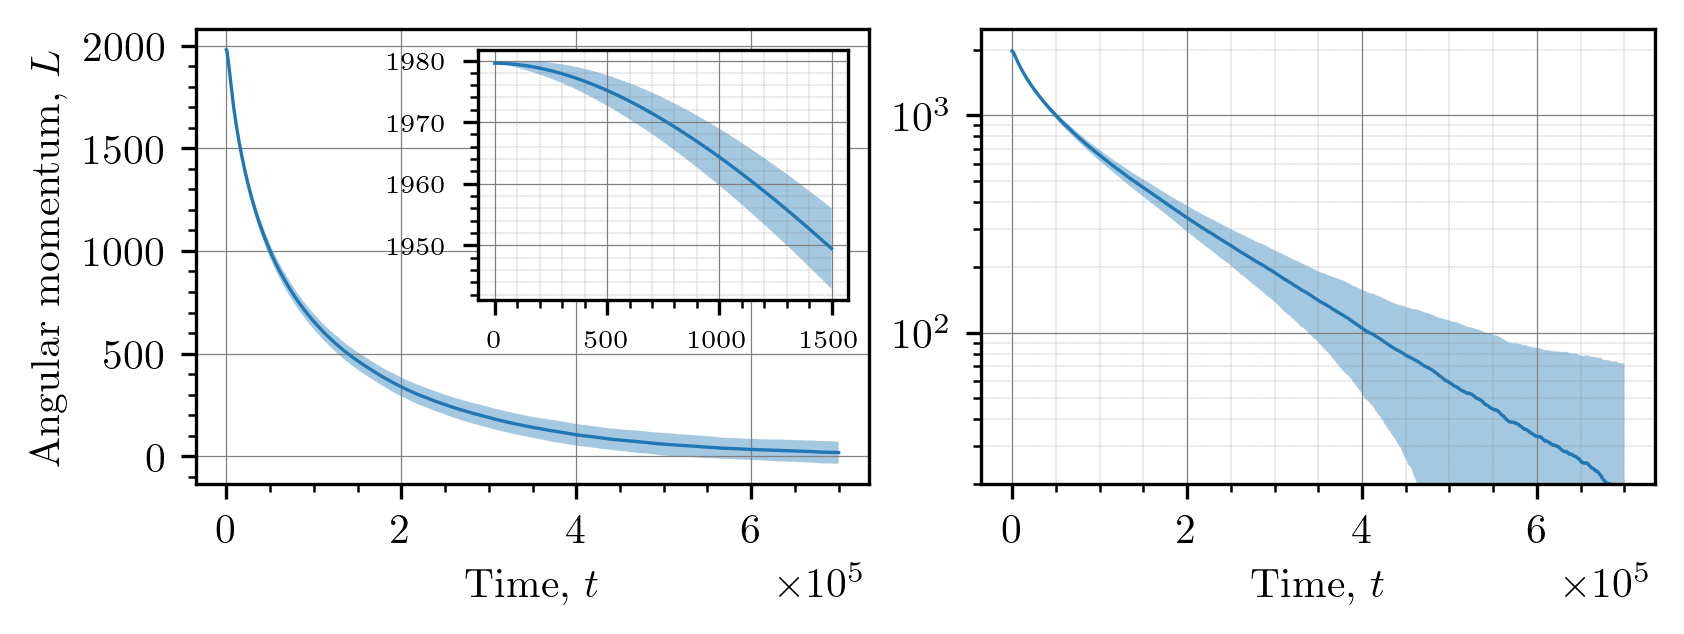

In [9]:
fig = plt.figure(constrained_layout=True, 
                #  figsize=(7,2.5) # paper
                 figsize=(5.5,2) # slide
                #  linewidth=10, edgecolor="#04253a"
                 )
spec5 = fig.add_gridspec(ncols=2, nrows=1, hspace=0.005)

ax = fig.add_subplot(spec5[0, 0])

ax.xaxis.set_major_formatter(x_formatter)
ax.minorticks_on()

ax.plot(df.index, df.L, lw=0.8)
ax.fill_between(df.index, df.L - df.Lstd, df.L + df.Lstd, alpha=0.4)
ax.grid( linewidth='0.3', color='gray')
ax.set_xlabel("Time, $t$")
ax.set_ylabel("Angular momentum, $L$")

### inset
inset_ax = inset_axes(ax, width="55%", height="55%", loc="upper right")
df1 = df0.loc[:1500:30]
inset_ax.plot(df1.index, df1.L, lw=0.8)
inset_ax.fill_between(df1.index, df1.L - df1.Lstd, df1.L + df1.Lstd, alpha=0.4)
inset_ax.tick_params(axis='both', which='major', labelsize=6)
inset_ax.minorticks_on()
inset_ax.grid(which='major', linestyle='-', linewidth='0.3', color='gray')
inset_ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')
# inset_ax.set_yscale("log")
#######

#######################################################
ax = fig.add_subplot(spec5[0, 1])
ax.xaxis.set_major_formatter(x_formatter)
ax.minorticks_on()

ax.plot(df.index, df.L, lw=0.8)
ax.fill_between(df.index, df.L - df.Lstd, df.L + df.Lstd, alpha=0.4)




# plt.grid(which="both")
ax.grid(which='major', linestyle='-', linewidth='0.3', color='gray')
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

ax.set_xlabel("Time, $t$")
# ax.set_ylabel("Angular momentum, $L$")

ax.set_yscale("log")

ax.set_ylim(20,2500)



# plt.tight_layout(pad=0)
plt.savefig("L.pdf",bbox_inches='tight')


In [11]:
len(df0.loc[:1500])

3001

In [4]:
df.columns

Index(['O', 'L', 'xy', 'T', 'zz', 'E', 'K', 'Lstd'], dtype='object')

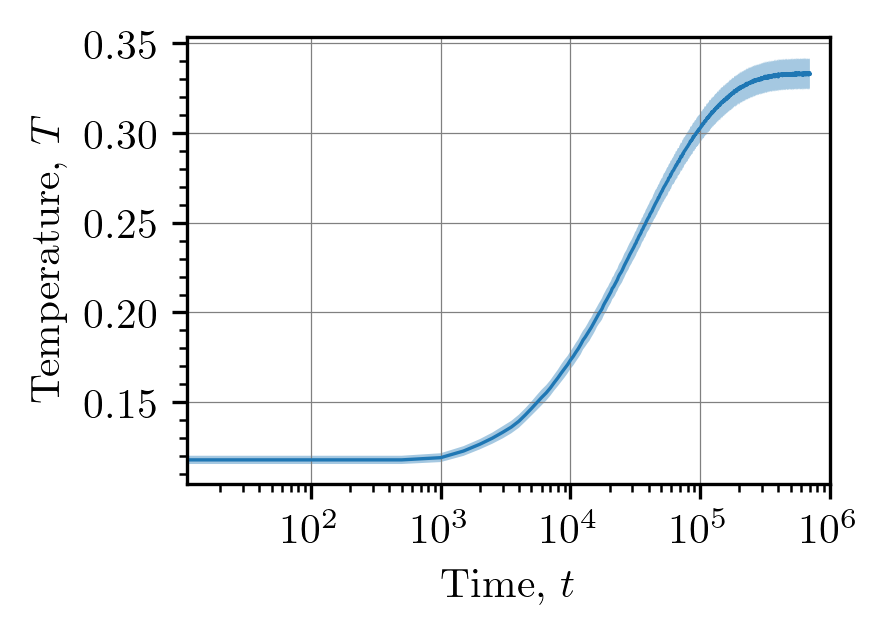

In [10]:
fig = plt.figure(constrained_layout=True, 
                # figsize=(3.5,2.5), # paper
                 figsize=(2.75,2) # slide
                #  linewidth=10, edgecolor="#04253a"
                 )
spec5 = fig.add_gridspec(ncols=1, nrows=1, hspace=0.005)

ax = fig.add_subplot(spec5[0, 0])

ax.xaxis.set_major_formatter(x_formatter)
ax.minorticks_on()

ax.plot(df.index, df["T"], lw=0.8)
ax.fill_between(df.index, df["T"] - df.Tstd, df["T"] + df.Tstd, alpha=0.4)
ax.grid(linewidth='0.3', color='gray')
ax.set_xlabel("Time, $t$")
ax.set_ylabel("Temperature, $T$")

ax.set_xscale("log")

ax.set_xlim(11,10**6)

# plt.tight_layout(pad=0)
plt.savefig("T.pdf",bbox_inches='tight')
